# Canadian-Vehicle-CO2-Emissions-Analysis

## 💾 The data 

### The dataset contains seven years of CO2 emissions details for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

# Introduction

In recent years, concerns about climate change and its impact on the environment have become increasingly urgent. As a result, governments around the world are taking action to reduce greenhouse gas emissions and promote sustainable practices. Canada is no exception, and the federal government has set ambitious targets for reducing carbon emissions and transitioning to a low-carbon economy.

In this project, we are working with a public policy advocacy organization in Canada to draft recommendations for guidelines on CO2 emissions rules. We have been tasked with investigating which vehicles produce lower emissions based on data gathered over seven years for a wide range of Canadian vehicles. Our goal is to analyze this data and provide recommendations for policies that can help reduce greenhouse gas emissions from the transportation sector. Through our research and analysis, we hope to contribute to Canada's efforts to combat climate change and promote a sustainable future.

# Exploratory Data Analysis
Exploratory Data Analysis, or EDA for short, is a crucial step in understanding and making sense of any dataset. Through this process, we can uncover patterns, detect anomalies, and test hypotheses, all with the aid of summary statistics and graphical representations.

To begin EDA, we must approach the dataset with a curious and open mindset, generating questions that can guide our investigation. By seeking answers through visualizations, transformations, and modeling, we can gain a deeper understanding of the data and refine our questions or generate new ones.

EDA is not a rigid process with strict rules but rather a flexible approach to data analysis that allows for experimentation and exploration. It is essential to investigate every idea that comes to mind, even if some turn out to be dead ends. With time and continued exploration, we can hone in on particularly productive areas and effectively communicate our findings to others.

Let's start our journey of exploring the data and unlocking its secrets.

## Import Data
The first part of any data science project is preparing your data, which means making sure its in the right place and format for you to conduct your analysis. The first step of any data preparation is importing your raw data and cleaning it. 

In [39]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

In [41]:
# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

The **numpy** library provides fast and efficient numerical computations in Python, and using numpy arrays can improve the performance of calculations compared to using pandas Series or DataFrames.

In this code snippet, the data from the pandas DataFrame **cars** is converted into numpy arrays using the **.to_numpy()** method for each column. These numpy arrays can then be used for various computations and analyses in the project.

In [42]:
cars.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


We use the [`head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) method to determine to look at the first five rows of our dataset.

In [43]:
cars.shape

(7385, 9)

This returns (7385, 9), which means we have 7,385 rows and 9 columns of data.

In [44]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


All the columns have the right data types.

## Data Preparation
Before beginning the analysis, we first need to clean the data. We will examine common issues such as missing data and duplicates.

In [45]:
# Check for missing values
cars.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

we can see that there are no missing values in any column.

In [46]:
cars.duplicated().sum()

1314

The output is 1314, which means there are 1314 duplicated rows in the DataFrame.

Next, we focus on conducting descriptive statistical analysis. The description includes the number of entities, their mean, standard deviation, minimum and maximum values of that particular attribute, and 25%, 50%(median), 75% of the values in the dataset.

But, it may be best to remove the duplicates before conducting the analysis.

In [47]:
# Drop duplicates
cars.drop_duplicates(inplace=True)

In [48]:
cars.shape

(6071, 9)

In [49]:
cars.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,6071.000000,6071.000000,6071.000000,6071.000000
mean,3.156679,5.614396,11.011613,250.950091
std,1.366384,1.854080,2.952487,59.263155
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,207.000000
50%,3.000000,6.000000,10.500000,245.000000
75%,3.700000,6.000000,12.700000,288.000000
max,8.400000,16.000000,26.100000,522.000000


## CO2 Emissions
In order to gain a better understanding of the feature of interest, it is important to investigate the relationships and dependencies between CO2 Emissions and other features in the dataset. This will help us identify potential factors that influence CO2 Emissions and allow us to make more informed conclusions about the data.

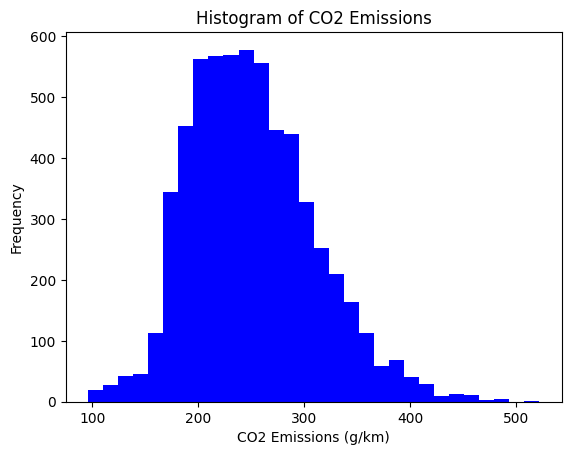

In [50]:
#Plot the distribution of CO2 Emissions
plt.hist(cars['CO2 Emissions(g/km)'], bins=30, color='b')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()

We can conclude from the histogram of CO2 Emissions, that the majority of the data points fall within the range of 200 to 300 grams per kilometer. This range has the highest frequency of data points, which means that most cars have emissions within this range.

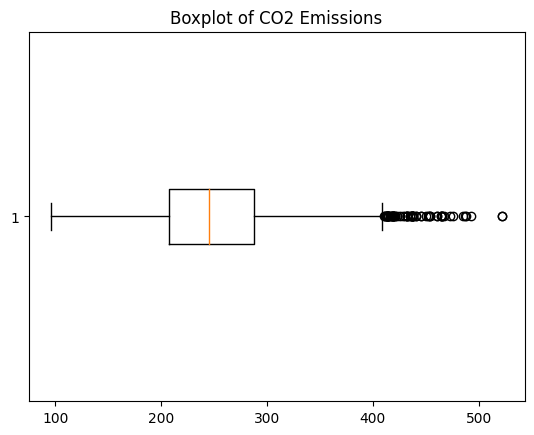

In [51]:
plt.boxplot(cars['CO2 Emissions(g/km)'], vert = False)
plt.title('Boxplot of CO2 Emissions')
plt.show()

### CO2 Emissions with Engine Size

**Task 1:** What is the median engine size in liters?

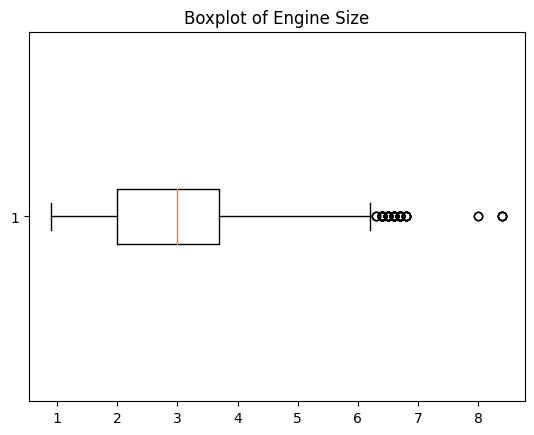

In [52]:
plt.boxplot(cars['Engine Size(L)'], vert = False)
plt.title('Boxplot of Engine Size')
plt.show()

In [53]:
cars["Engine Size(L)"].median()

3.0

**The median engine size is 3.0 liters**.
- This means that half of the vehicles have an engine size larger than 3.0 liters

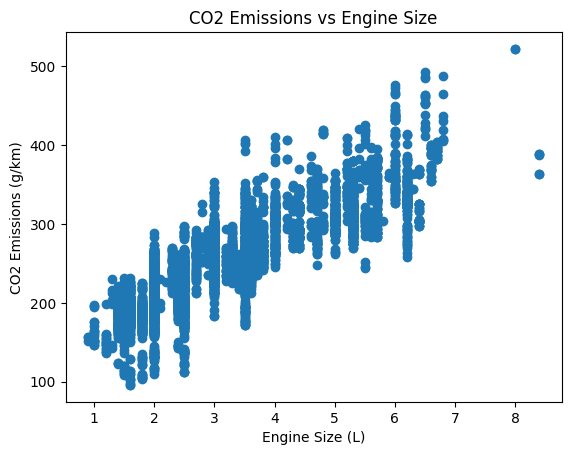

In [54]:
plt.scatter(cars['Engine Size(L)'], cars['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

In [55]:
correlation = cars['Engine Size(L)'].corr(cars['CO2 Emissions(g/km)'])
print("Correlation between engine size and CO2 emissions:", correlation)

Correlation between engine size and CO2 emissions: 0.8567983015652314


- This indicates that larger engines tend to produce more CO2 emissions

### CO2 Emissions with Fuel Consumption Comb

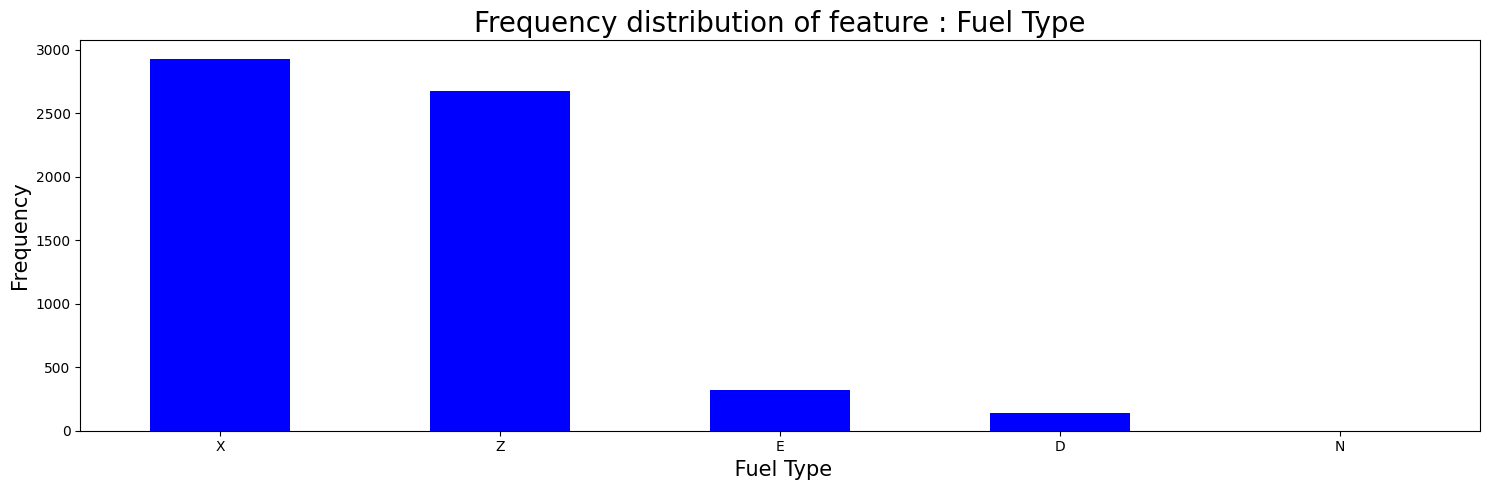

In [56]:
plt.figure(figsize=(15,5));
cars.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar", color='b')

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

-  Car which runs on Gasoline let it be X or Z is the most common vehicle type.

**Task 2:** What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [57]:
fuel_type_avg = cars.groupby("Fuel Type")[["Fuel Consumption Comb (L/100 km)"]].mean().round(2).sort_values(by = "Fuel Consumption Comb (L/100 km)", ascending = False)
fuel_type_avg

,Fuel Consumption Comb (L/100 km)
Fuel Type,
E,16.93
N,12.70
Z,11.40
X,10.11
D,8.73


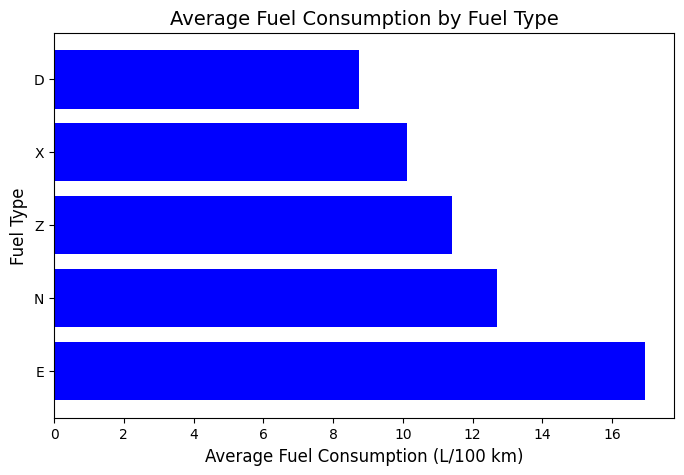

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(fuel_type_avg.index, fuel_type_avg["Fuel Consumption Comb (L/100 km)"], color="blue")
ax.set_xlabel("Average Fuel Consumption (L/100 km)", fontsize=12)
ax.set_ylabel("Fuel Type", fontsize=12)
ax.set_title("Average Fuel Consumption by Fuel Type", fontsize=14)
plt.show()

**Task 3:** What is the correlation between fuel consumption and CO2 emissions?

In [59]:
correlation = cars['Fuel Consumption Comb (L/100 km)'].corr(cars['CO2 Emissions(g/km)'])
print("Correlation between Fuel Consumption Comb and CO2 emissions:", correlation)

Correlation between Fuel Consumption Comb and CO2 emissions: 0.9159718021139933


- The correlation between fuel consumption and CO2 emissions is strong, with a coefficient of 0.915971. This is because carbon dioxide emissions are directly related to the amount of fuel consumed, and this relationship varies from fuel to fuel.

In [60]:
highest_co2_fuel = cars.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values(ascending=False)
highest_co2_fuel

Fuel Type
E    275.978328
Z    265.519058
X    235.681352
D    234.685315
N    213.000000
Name: CO2 Emissions(g/km), dtype: float64

- The resulting series shows that the fuel type with the highest CO2 emissions is ethanol (E), with an average of 275.98 g/km

### CO2 Emissions with Vehicle Class

**task 4:** Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 

<AxesSubplot: xlabel='Vehicle Class'>

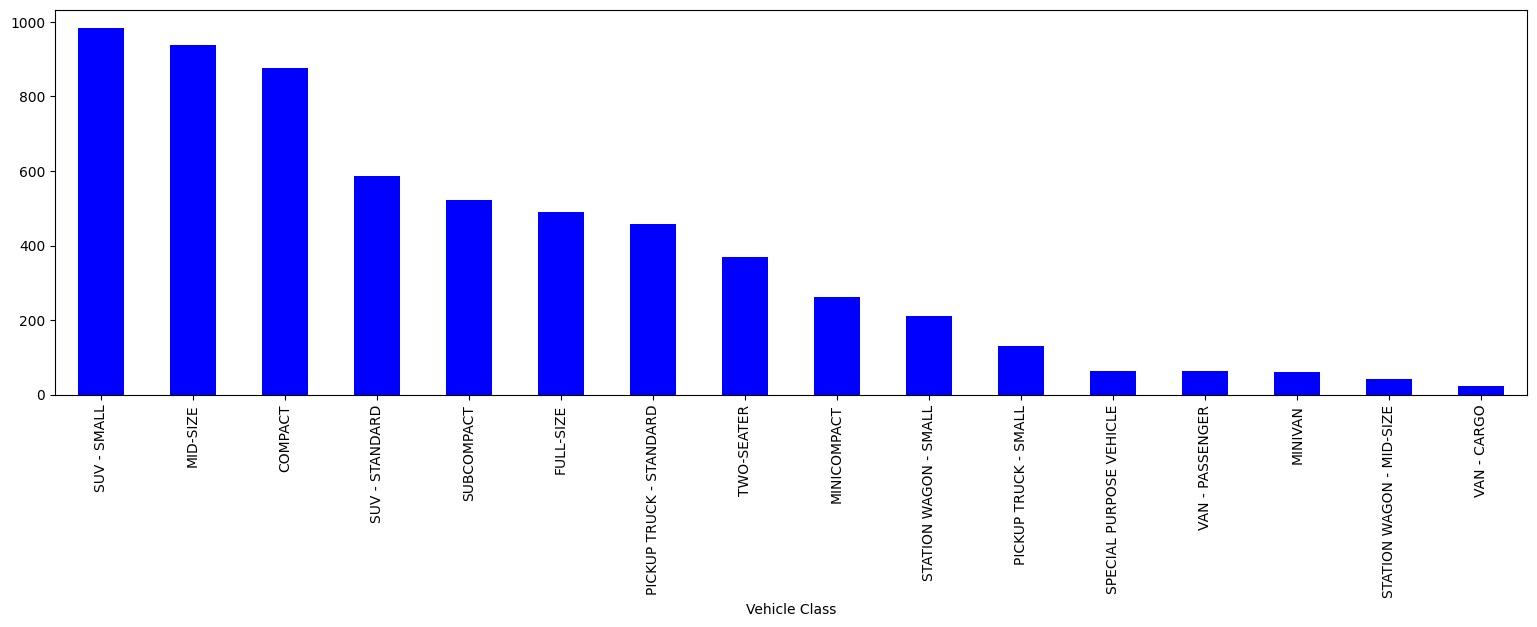

In [61]:
plt.figure(figsize=(19,5));
cars.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar", color='b')

- SUV - SMALL and MID-Size vehicles are the most frequent ones on Canadian roads

In [62]:
veh_avg_co2 = cars[cars['Vehicle Class'].isin(["SUV - SMALL", "MID-SIZE"])].groupby("Vehicle Class")[["CO2 Emissions(g/km)"]].mean().round(2).sort_values(by = "CO2 Emissions(g/km)")

veh_avg_co2

,CO2 Emissions(g/km)
Vehicle Class,
MID-SIZE,222.44
SUV - SMALL,236.08


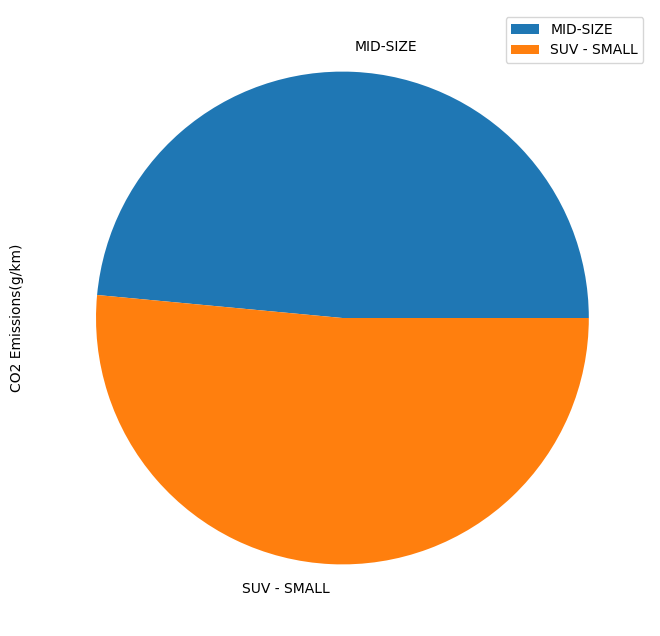

In [63]:
veh_avg_co2.plot(kind='pie', subplots=True, figsize=(8, 8));

- The Mid-size vehicles have lower average CO2 emission (222.44) compared to suv-small vehicles (236.08)

**task 5:** What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [64]:
#average CO2 emissions for all vehicles
round(cars['CO2 Emissions(g/km)'].mean(),2)

250.95

- The average CO2 emissions for all vehicle is 250.95 g/Km

In [65]:
#average CO2 emissions for each vehicle
all_veh_avr_co2 = cars.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean()
all_veh_avr_co2

Vehicle Class
COMPACT                     217.696347
FULL-SIZE                   263.644172
MID-SIZE                    222.438634
MINICOMPACT                 236.659004
MINIVAN                     260.533333
PICKUP TRUCK - SMALL        276.638462
PICKUP TRUCK - STANDARD     302.115974
SPECIAL PURPOSE VEHICLE     237.693548
STATION WAGON - MID-SIZE    241.738095
STATION WAGON - SMALL       202.390476
SUBCOMPACT                  244.733716
SUV - SMALL                 236.082317
SUV - STANDARD              306.371380
TWO-SEATER                  281.821622
VAN - CARGO                 361.500000
VAN - PASSENGER             395.548387
Name: CO2 Emissions(g/km), dtype: float64

In [66]:
# average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
Eng_size_sub = cars[cars['Engine Size(L)'] <= 2.0]
Eng_size_sub['CO2 Emissions(g/km)'].mean().round(2)

198.58

- The average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller is 198.58 g/Km

In [67]:
# average CO2 emissions for each vehicle with an engine size of 2.0 liters or smaller?
Eng_size_sub = cars[cars['Engine Size(L)'] <= 2.0]
all_veh_avr_co2_low2 = Eng_size_sub.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean()
all_veh_avr_co2_low2

Vehicle Class
COMPACT                     190.926740
FULL-SIZE                   189.633333
MID-SIZE                    189.421717
MINICOMPACT                 192.250000
SPECIAL PURPOSE VEHICLE     229.709677
STATION WAGON - MID-SIZE    199.950000
STATION WAGON - SMALL       194.413043
SUBCOMPACT                  199.212871
SUV - SMALL                 220.605195
SUV - STANDARD              240.294118
TWO-SEATER                  194.777778
Name: CO2 Emissions(g/km), dtype: float64

## Cylinders

<AxesSubplot: title={'center': 'Frequency distribution of feature :Cylinders'}>

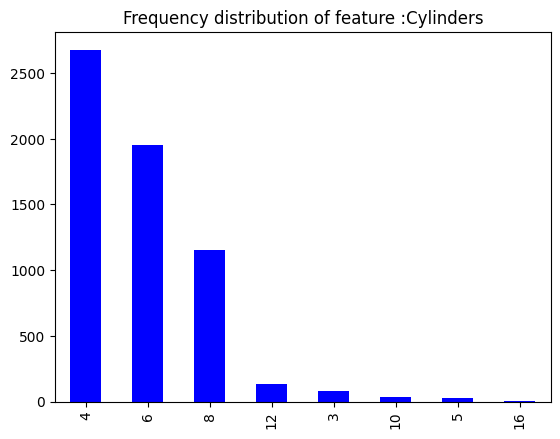

In [68]:
cars["Cylinders"].value_counts().plot(kind='bar', title="Frequency distribution of feature :Cylinders", color='b')

- Most of the cars have 4 cylinders.

Text(0, 0.5, 'CO2 Emissions(g/km)')

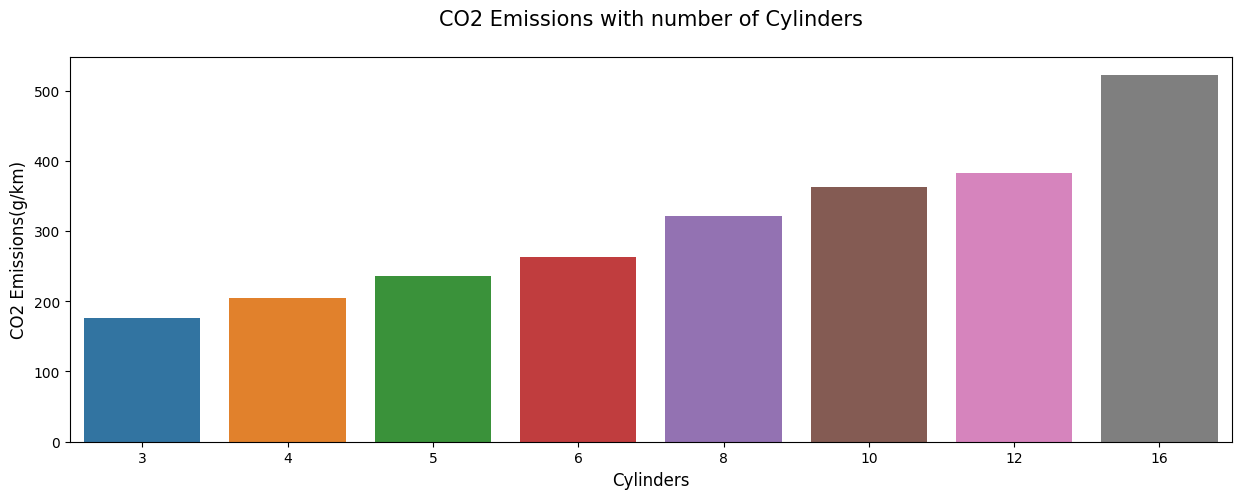

In [69]:
CO2_cylinder = cars.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder)
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

- Vehicles with smaller cylinders have low CO2 emission rates.

## Make and Model

In [70]:
cars["Make"].nunique()

42

<AxesSubplot: title={'center': 'Frequency distribution of feature :Make'}>

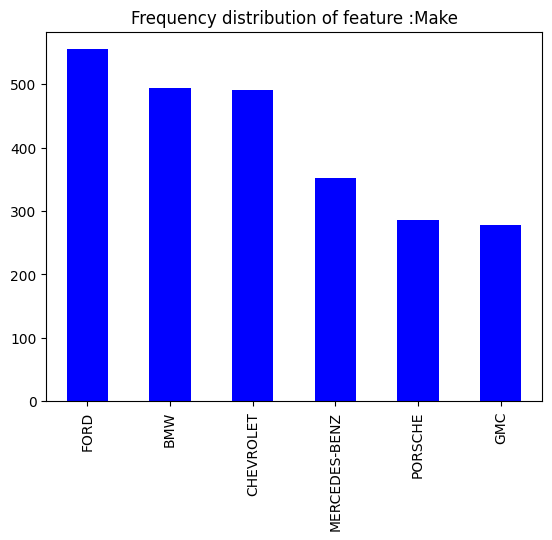

In [71]:
cars["Make"].value_counts().head(6).plot(kind='bar', title="Frequency distribution of feature :Make", color='b')

- Out of the 42 car brands Ford and BMW are the most dominating ones. 

<AxesSubplot: title={'center': 'Frequency distribution of feature :Model'}>

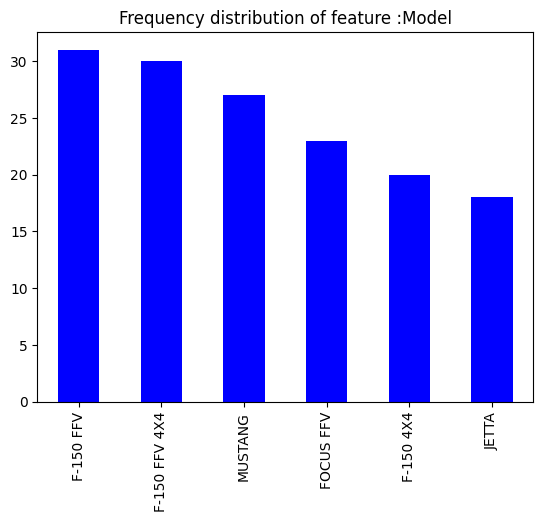

In [72]:
cars["Model"].value_counts().head(6).plot(kind='bar', title="Frequency distribution of feature :Model", color='b')

## Transmission

In [73]:
cars["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

- The 27 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account

In [74]:
cars['Transmission'] = cars['Transmission'].str.replace('\d', '')

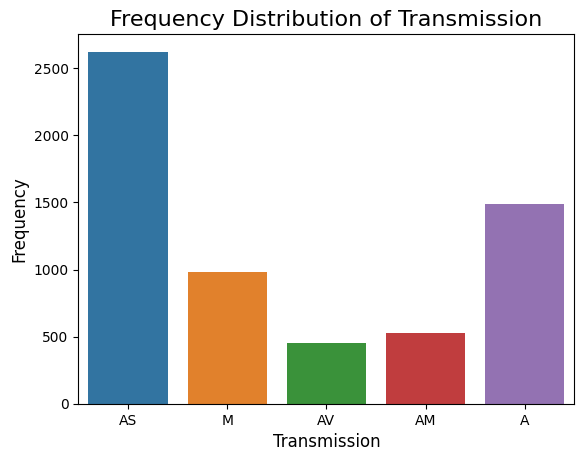

In [75]:
sns.countplot(x='Transmission', data=cars)
plt.title('Frequency Distribution of Transmission', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

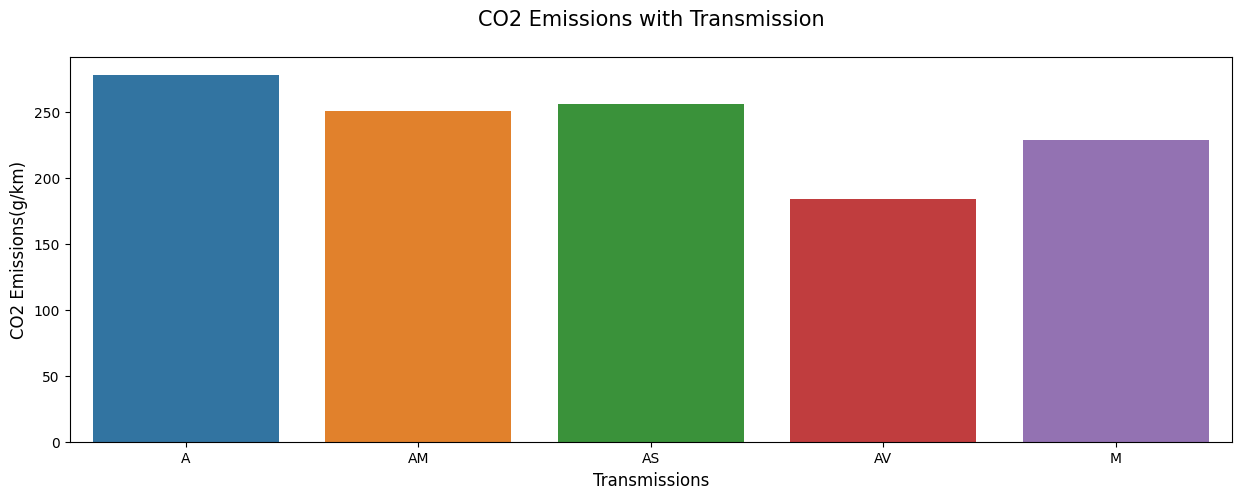

In [76]:
CO2_transmission = cars.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)",data = CO2_transmission)
plt.title('CO2 Emissions with Transmission\n', fontsize=15)
plt.xlabel('Transmissions', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

- The type of transmission can impact CO2 emissions. Generally, automatic transmissions tend to have higher CO2 emissions compared to manual transmissions. This is because automatic transmissions have more moving parts and are generally less efficient than manual transmissions

# Conclusions

- The median engine size is 3.0 liters.
- The average Fuel consumption for each Fuel types are :
	- E = 16.93
	- N = 12.7
	- Z = 11.4
	- X = 10.11
	- D = 8.73
- The correlation between fuel consumption and CO2 emissions is strong, with a coefficient of 0.9159.
- SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent ones on Canadian roads.
- The Mid-size vehicles have lower average CO2 emission (222.44) compared to suv-small vehicles (236.08)
- The average CO2 emissions for all cars in the dataset is 250.95 g/km, with a standard deviation of 59.26 g/km.
- The average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller is 198.58 g/Km
- The boxplot shows that there are outliers for CO2 emissions above 400 g/km.
- There is a strong positive correlation between engine size and CO2 emissions, indicating that cars with larger engines tend to emit more CO2 than those with smaller engines.
- The median engine size of the vehicles in the dataset is 3.0 liters, suggesting that this is a popular engine size among consumers.
- The frequency distribution of transmission types shows that the majority of cars in the dataset have an Automatic with select shift transmission.
- Most vehicles use X fuel (Regular gasoline) and it has a low CO2 emission rate.
- E fuel (Ethanol) has the highest CO2 emission rate.
- Carbon dioxide emissions are directly related to the amount of fuel consumed, and this relationship varies from fuel to fuel.
- Vehicles with smaller cylinders have low CO2 emission rates.This is because the amount of fuel burned in the engine is proportional to the number of cylinders, and therefore smaller engines burn less fuel.


# Recommendations

- Encourage consumers to choose vehicles with smaller engine sizes, which emit less CO2 and have lower average fuel consumption. Car manufacturers could be incentivized to produce more smaller engine size vehicles, and car dealerships could offer discounts or rebates for these types of vehicles.
- Increase public awareness about the impact of different types of fuel on CO2 emissions. Ethanol fuel emits the most CO2, so consumers should be encouraged to avoid purchasing vehicles that run on this type of fuel. Instead, consumers could be encouraged to choose vehicles that run on fuels with lower CO2 emissions, such as diesel or regular gasoline.
- Promote the use of public transportation, carpooling, and alternative forms of transportation, such as biking or walking. This would reduce the number of vehicles on the road, which would in turn reduce overall CO2 emissions.

- Encourage the development and use of renewable energy sources, such as wind and solar power, to power electric vehicles. This would reduce CO2 emissions from transportation.

- Provide tax incentives for consumers who purchase fuel-efficient vehicles, such as hybrid or electric vehicles. This would encourage consumers to choose vehicles that emit less CO2 and have lower average fuel consumption.

- Encourage car manufacturers to invest in research and development of alternative fuel technologies that emit lower levels of CO2. This could include hydrogen fuel cells or biofuels.

- Increase public awareness about the importance of regular vehicle maintenance to ensure that cars are running at peak efficiency. This would help to reduce average fuel consumption and CO2 emissions.

- Increase public awareness about the impact of driving habits on fuel consumption and CO2 emissions. Encourage drivers to adopt eco-friendly driving habits, such as avoiding rapid acceleration and braking, maintaining a consistent speed, and avoiding idling.

- Encourage car manufacturers to produce more vehicles with manual transmissions, which tend to have lower average fuel consumption and emit less CO2 than automatic transmissions.